In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
dataset = pd.read_csv("/diabetes.csv")

In [5]:
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
x = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [8]:
y = dataset['Outcome']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4 , random_state=101)

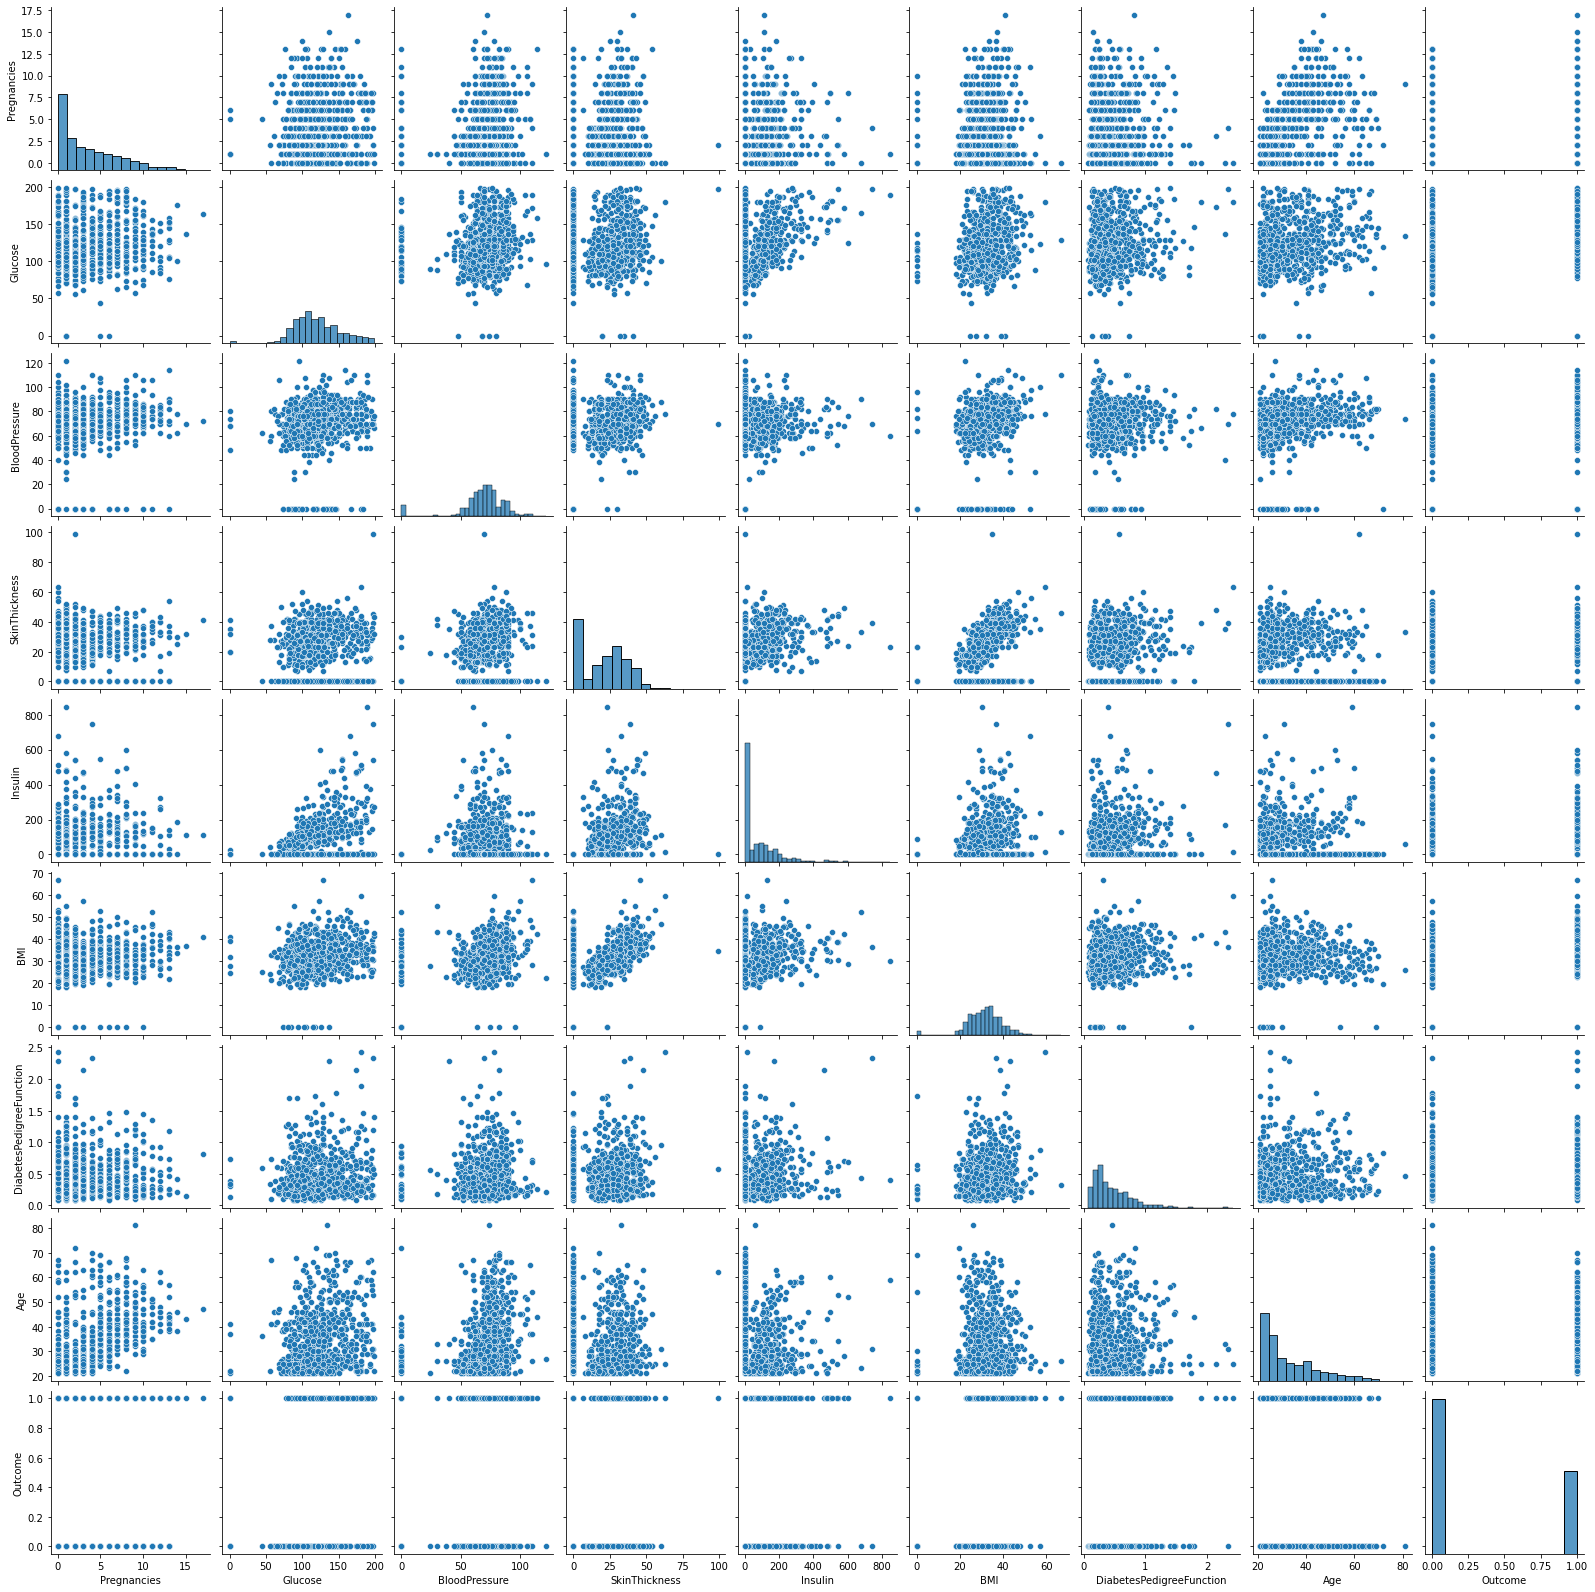

In [10]:
sns.pairplot(dataset)

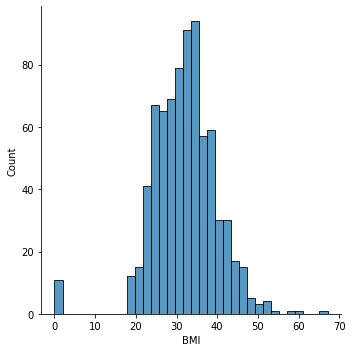

In [11]:
sns.displot(dataset['BMI'])

<AxesSubplot:>

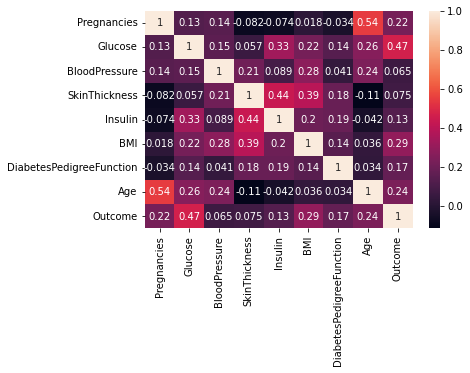

In [12]:
sns.heatmap(dataset.corr(), annot = True)

In [13]:
from sklearn.linear_model import LinearRegression 

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(x_train, y_train)

LinearRegression()

In [16]:
prediction = lm.predict(x_test)

In [17]:
lm.score(x_train, y_train)

0.318434525685825

In [18]:
lm.score(x_test, y_test)

0.26521461664069135

In [19]:
print(confusion_matrix(y_test,prediction))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
print(lm.intercept_)

In [ ]:
lm.coef_

In [ ]:
x_train.columns

In [ ]:
cdf = pd.DataFrame(lm.coef_, x.columns, columns=['Coeff'])

In [ ]:
cdf.head()


In [ ]:
prediction = lm.predict(x_test)

In [ ]:
plt.plot(y_test, prediction)

In [ ]:
sns.displot((y_test-prediction))

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, prediction)

In [ ]:
dataset.isnull()

In [ ]:
sns.heatmap(dataset,yticklabels=False, cbar= False, cmap ='viridis')

In [ ]:
sns.set_style('whitegrid')

In [ ]:
sns.countplot(x ='Outcome', hue= 'Pregnancies' , data = dataset)

In [ ]:
p = dataset.drop('Outcome', axis = 1)
q= dataset['Outcome']

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel = LogisticRegression()

In [23]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [24]:
print( logmodel.score(x_train, y_train))

0.7673913043478261


In [25]:
print( logmodel.score(x_test, y_test))

0.762987012987013


In [26]:
predic = logmodel.predict(x_test)

In [27]:
print(confusion_matrix(y_test,predic))

[[173  29]
 [ 44  62]]


In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       202
           1       0.68      0.58      0.63       106

    accuracy                           0.76       308
   macro avg       0.74      0.72      0.73       308
weighted avg       0.76      0.76      0.76       308



In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(q_test, predic)

NameError: name 'q_test' is not defined

In [32]:
fig = plt.figure(figsize=(10,8))




<Figure size 720x576 with 0 Axes>

In [33]:
fig

<Figure size 720x576 with 0 Axes>

visualization

In [34]:
plt.scatter(y_test, knnpred)

NameError: name 'knnpred' is not defined

In [35]:
sns

<module 'seaborn' from 'd:\\python\\python385\\lib\\site-packages\\seaborn\\__init__.py'>

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)


DecisionTreeClassifier()

In [37]:
dtc.score(x_train, y_train)

1.0

In [38]:
dtc.score(x_test, y_test)

0.7305194805194806

In [39]:
dtcpredic = dtc.predict(x_test)
confusion_matrix(y_test,dtcpredic)


array([[154,  48],
       [ 35,  71]], dtype=int64)

In [40]:

print(classification_report(q_test,dtcpredic))


NameError: name 'q_test' is not defined

ModuleNotFoundError: No module named 'statsmodels'

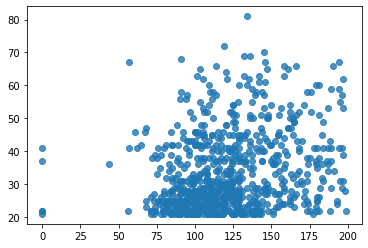

In [43]:
import seaborn as sns
sns.regplot(x='Glucose', y='Age', data=dataset, logistic=True)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_estimators =200)

In [46]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [47]:
rfc_pred = rfc.predict(x_test)

In [48]:
estimator = rfc.estimators_[5]

In [49]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = labels[:-1],
                class_names = dataset.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

NameError: name 'labels' is not defined

In [50]:
print(rfc.score(x_train, y_train))

1.0


In [51]:
print(rfc.score(x_test, y_test))

0.7435064935064936


In [52]:
print(confusion_matrix(y_test,rfc_pred))

[[160  42]
 [ 37  69]]


In [53]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       202
           1       0.62      0.65      0.64       106

    accuracy                           0.74       308
   macro avg       0.72      0.72      0.72       308
weighted avg       0.75      0.74      0.74       308



In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()

In [56]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [57]:
knn.score(x_train,y_train)

0.8043478260869565

In [58]:
knn.score(x_test,y_test)

0.7435064935064936

In [59]:
knnpred = knn.predict(x_test)

In [60]:
print(confusion_matrix(y_test,knnpred))

[[164  38]
 [ 41  65]]


In [61]:
print(classification_report(y_test, knnpred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       202
           1       0.63      0.61      0.62       106

    accuracy                           0.74       308
   macro avg       0.72      0.71      0.71       308
weighted avg       0.74      0.74      0.74       308



In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
gnb = GaussianNB()

In [64]:
gnb.fit(x_train, y_train)

GaussianNB()

In [65]:
gnb.score(x_train,y_train)

0.7608695652173914

In [66]:
gnb.score(x_test,y_test)

0.7467532467532467

In [67]:
gnbpred = gnb.predict(x_test)

In [68]:
print(confusion_matrix(y_test,gnbpred))

[[160  42]
 [ 36  70]]


In [69]:
print(classification_report(y_test, gnbpred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       202
           1       0.62      0.66      0.64       106

    accuracy                           0.75       308
   macro avg       0.72      0.73      0.72       308
weighted avg       0.75      0.75      0.75       308



In [70]:
from sklearn.svm import SVC

In [71]:
supvc = SVC()

In [72]:
supvc.fit(x_train, y_train)

SVC()

In [73]:
supvc.score(x_train,y_train)

0.7956521739130434

In [74]:
supvc.score(x_test,y_test)

0.7662337662337663

In [75]:
supvc =supvc.predict(x_test)

In [76]:
print(confusion_matrix(y_test,supvc))

[[169  33]
 [ 39  67]]


In [77]:
print(classification_report(y_test, supvc))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       202
           1       0.67      0.63      0.65       106

    accuracy                           0.77       308
   macro avg       0.74      0.73      0.74       308
weighted avg       0.76      0.77      0.76       308



In [10]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')

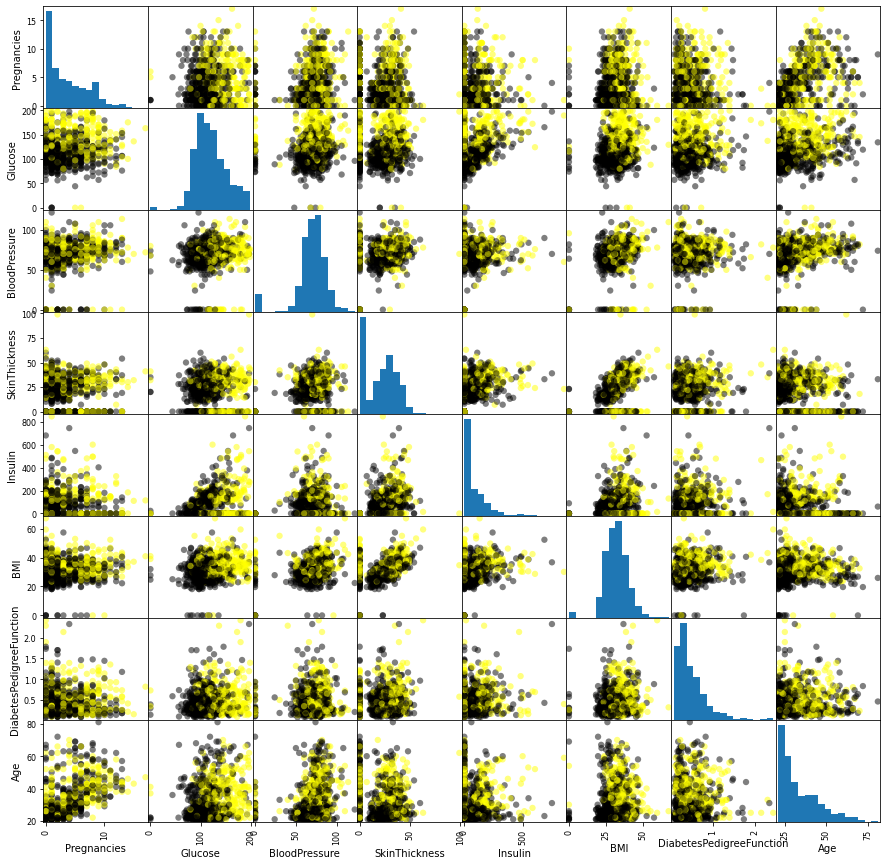

In [11]:
scatter = scatter_matrix(x,c =y, marker ='o', s =40, hist_kwds={'bins':15}, figsize =(15,15), cmap = cmap)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

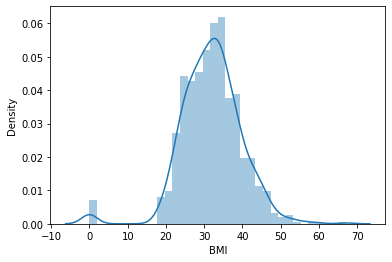

In [12]:
sns.distplot(dataset['BMI'])

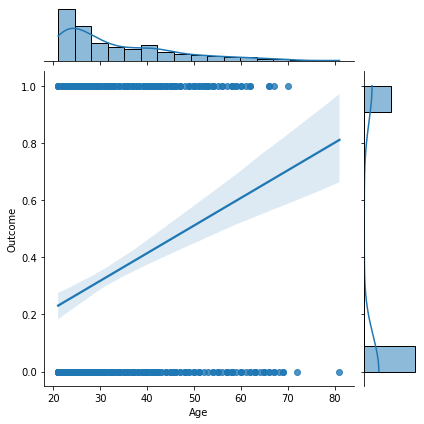

In [13]:
sns.jointplot(x='Age', y='Outcome', data = dataset, kind= 'reg')

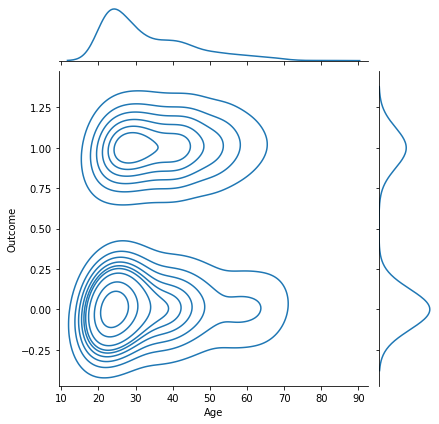

In [14]:
sns.jointplot(x='Age', y='Outcome', data = dataset, kind= 'kde') #kde is kernel distribution estimation plot

<AxesSubplot:xlabel='Glucose'>

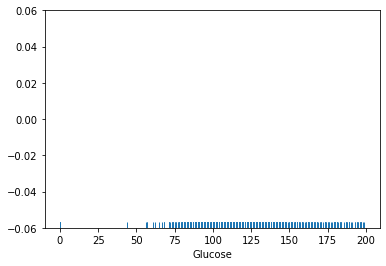

In [83]:
sns.rugplot(dataset["Glucose"])

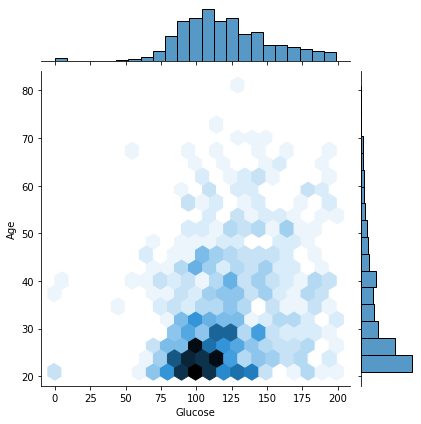

In [84]:
sns.jointplot(x='Glucose', y='Age', data = dataset, kind= 'hex')

In [15]:
corrdata = dataset.corr()

<AxesSubplot:>

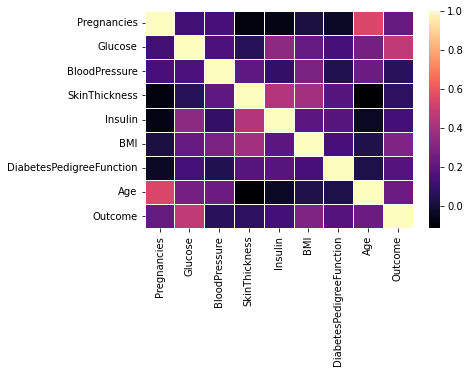

In [7]:
sns.heatmap(corrdata, cmap = 'magma' ,linecolor= 'white', linewidth= 1)

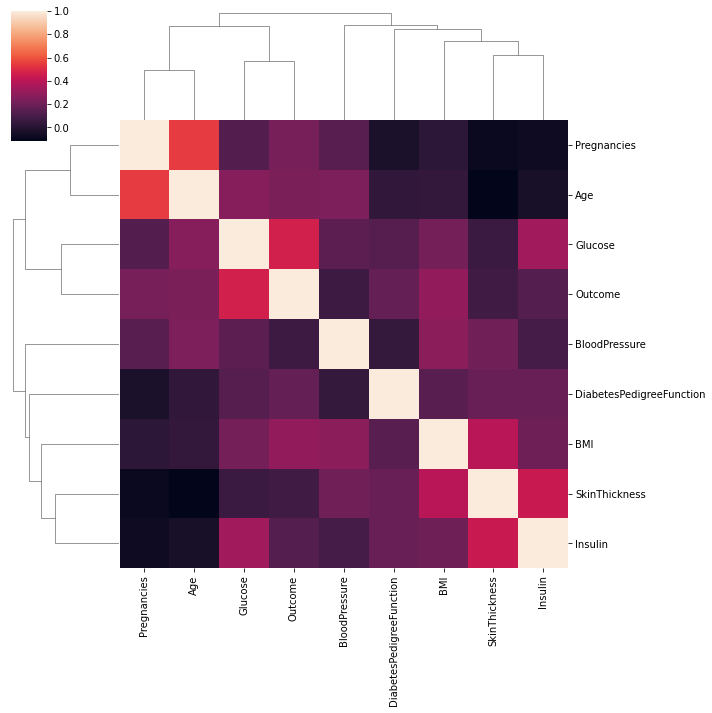

In [87]:
#clustermap
sns.clustermap(corrdata)

In [88]:
g = sns.PairGrid(dataset)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

d:\python\python385\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\python\python385\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\python\python385\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for

Error in callback <function flush_figures at 0x0483D4A8> (for post_execute):


KeyboardInterrupt: 

In [89]:
g = sns.FacetGrid(data= dataset, col ='Glucose', row = 'Age')#only for categorical labels

KeyboardInterrupt: 

MemoryError: In RendererAgg: Out of memory

<Figure size 29376x11232 with 81 Axes>

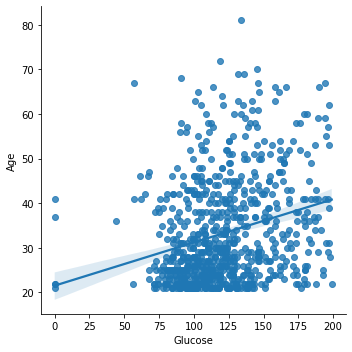

In [82]:
sns.lmplot(x= 'Glucose', y='Age', data= dataset)#hue is for categorical labels

In [16]:
newdata = dataset.replace({'Outcome': {0: 'No', 
                                1: 'Yes'}}) #supposed to change the Outcome values to true or False

In [17]:
newdata.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50     Yes  
1                     0.351   31      No  
2                     0.672   32     Yes  
3                     0.167   21      No  
4                     2.288   33     Yes

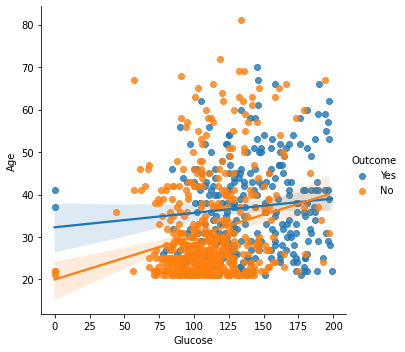

In [93]:
sns.lmplot(x= 'Glucose', y='Age', data= newdata, hue= 'Outcome')

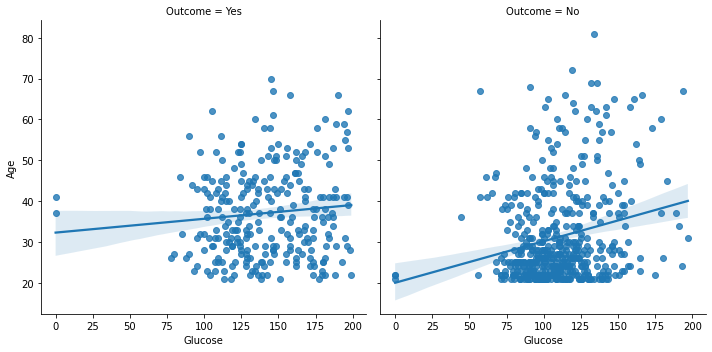

In [94]:
sns.lmplot(x= 'Glucose', y='Age', data= newdata, col= 'Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

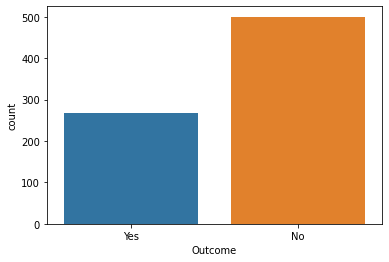

In [95]:
sns.countplot(x= 'Outcome', data = newdata)

In [18]:
import cufflinks as cf
import chart_studio as cs

In [19]:
import plotly as pl

In [20]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [21]:
init_notebook_mode(connected = True)

In [22]:
cf.go_offline()

In [23]:
dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [24]:
corrdata.iplot()

In [25]:
corrdata.iplot(kind='scatter', x ='Glucose', y='Age', mode= 'markers')

In [26]:
newdata.iplot(kind = 'bar', x ='Outcome', y='Glucose') #for bar plot we need a categorical lable

In [35]:
corrdata.sum().iplot(kind= 'bar')#for non categorical value we sum up the values

In [37]:
corrdata.iplot(kind='box')

In [40]:
corrdata.iplot(kind='surface', colorscale ='rdylbu')

In [43]:
corrdata.iplot(kind= 'hist')

In [45]:
corrdata.iplot(kind='spread')

C:\Python310\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Python310\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [48]:
dataset.iplot(kind='bubble', x= 'Glucose', y='Age',size='BMI')#this kind is ususlly suited for UN reports or world happiness reports


In [27]:
dataset.scatter_matrix()